In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

df = pd.read_csv('colresult3.csv')

In [2]:
print(df)

          발매가  브랜드  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  \
0      259000    3  21    0      4          1     9     0     0     0     0   
1      259000    3  21    0      4          1     9     0     0     0     0   
2      259000    3  21    0      4          1     9     0     0     0     0   
3      259000    3  21    0      4          1     9     0     0     0     0   
4      259000    3  21    0      4          1     9     0     0     0     0   
...       ...  ...  ..  ...    ...        ...   ...   ...   ...   ...   ...   
43948  209000    5  28   40     10          1     9     0     0     0     0   
43949  209000    5  28   40     10          1     9     0     0     0     0   
43950  209000    5  28   40     10          1     9     0     0     0     0   
43951  209000    5  28   40     10          1     9     0     0     0     0   
43952  209000    5  28   40     10          1     9     0     0     0     0   

       type  day  
0       1.0    0  
1       1.0  

In [3]:
df2 = df[(df['day'] == 1)]

In [4]:
print(df2)

          발매가  브랜드  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  \
1      259000    3  21    0      4          1     9     0     0     0     0   
93     149000    3  24    0      9          1     9     0     0     0     0   
185    139000    3  17    0      5          2     9     3     0     0     0   
278    149000    3  24    0      2          1     9     0     0     0     0   
368     99000    3  18    0      1          1     9     0     0     0     0   
...       ...  ...  ..  ...    ...        ...   ...   ...   ...   ...   ...   
43493  284400    4  25    0     12          1     6     0     0     0     0   
43584  600000    4  26   39      9          2     3     5     0     0     0   
43676  309000    4  25    0      4          1     7     0     0     0     0   
43768  289000    4  25    0     10          1     9     0     0     0     0   
43861  209000    5  28   40     10          1     9     0     0     0     0   

       type  day  
1       1.0    1  
93      1.0  

In [5]:
df2 = df2.sample(frac=1).reset_index(drop=True)

In [6]:
yx = df["type"]
yx_test = df["type"][320:477]

In [7]:
X = df[['발매가', '라인', '브랜드', 'color_num','col2', 'col5', 'col4']]
X = np.asarray(X).astype(np.int)
y = np.empty((477,3))

<ipython-input-7-06404281d320>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.asarray(X).astype(np.int)


In [8]:
for i in range(477):
    if yx[i] == 0.0:
        y[i] = [1, 0, 0]
    elif yx[i] == 1.0:
        y[i] = [0, 1, 0]
    else:
        y[i] = [0, 0, 1]

In [9]:
X_train, y_train = X[0:320], y[0:320]
X_test,  y_test  = X[320:477], y[320:477]

In [10]:
model = tf.keras.Sequential()  
model.add(layers.Dense(7, input_shape=(7,)))  
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.01))        

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax')) 

# 모델 구축
model.compile(
    loss= 'categorical_crossentropy', 
    optimizer="adam",   
    metrics=['accuracy'])  

In [11]:
hist = model.fit(
    X_train, y_train,
    batch_size= 10,  
    epochs=100,      
    validation_split = 0.2,
    shuffle = False,

    verbose=1)  

# 테스트 데이터로 성능평가
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/100
26/26 [==============================] - 1s 20ms/step - loss: 2247.5229 - accuracy: 0.1562 - val_loss: 197.0480 - val_accuracy: 0.3125
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 199.9619 - accuracy: 0.5156 - val_loss: 138.1285 - val_accuracy: 0.3125
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 128.6557 - accuracy: 0.5195 - val_loss: 134.1147 - val_accuracy: 0.3125
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 58.3535 - accuracy: 0.5977 - val_loss: 121.2541 - val_accuracy: 0.3281
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 69.1658 - accuracy: 0.5156 - val_loss: 76.5665 - val_accuracy: 0.3125
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 29.7482 - accuracy: 0.6211 - val_loss: 74.6468 - val_accuracy: 0.3281
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 43.1575 - accuracy: 0.5078 - val_loss: 65.1494 - val_accurac

26/26 [==============================] - 0s 3ms/step - loss: 4.9963 - accuracy: 0.7070 - val_loss: 1.4348 - val_accuracy: 0.3125
Epoch 59/100
26/26 [==============================] - 0s 3ms/step - loss: 0.8888 - accuracy: 0.7070 - val_loss: 1.4426 - val_accuracy: 0.3125
Epoch 60/100
26/26 [==============================] - 0s 3ms/step - loss: 1.8243 - accuracy: 0.7031 - val_loss: 1.4502 - val_accuracy: 0.3125
Epoch 61/100
26/26 [==============================] - 0s 3ms/step - loss: 1.1268 - accuracy: 0.6914 - val_loss: 1.4576 - val_accuracy: 0.3125
Epoch 62/100
26/26 [==============================] - 0s 3ms/step - loss: 2.8268 - accuracy: 0.7070 - val_loss: 1.4655 - val_accuracy: 0.3125
Epoch 63/100
26/26 [==============================] - 0s 3ms/step - loss: 1.2198 - accuracy: 0.7109 - val_loss: 1.4731 - val_accuracy: 0.3125
Epoch 64/100
26/26 [==============================] - 0s 3ms/step - loss: 1.3812 - accuracy: 0.7031 - val_loss: 1.4765 - val_accuracy: 0.3125
Epoch 65/100
26/26 

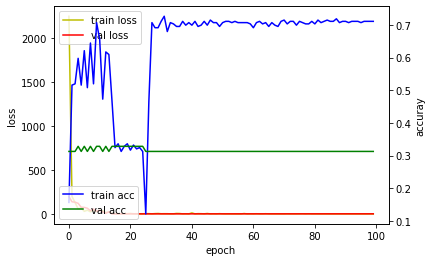

In [12]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [13]:
y_pred = model.predict(X_test)

In [14]:
print(y_pred)

[[0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.0321633 0.6495307 0.318306 ]
 [0.032163

In [15]:
y_class = y_pred.argmax(axis=-1)
y_class

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [16]:
print(yx_test)

320    1.0
321    1.0
322    1.0
323    1.0
324    1.0
      ... 
472    1.0
473    1.0
474    1.0
475    1.0
476    1.0
Name: type, Length: 157, dtype: float64


In [17]:
yx_test = list(yx_test)
print(yx_test)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [22]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix, f1_score
precision = precision_score(yx_test,y_class, average= "macro")
print(precision)

0.2611464968152866


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
recall = recall_score(yx_test,y_class, average= "macro")
print(recall)

0.3333333333333333


In [24]:
print(f1_score(yx_test,y_class, average= "macro"))

0.29285714285714287
